08 ニューラルネットワーク
=====================

* `ニューラルネットワーク`というアルゴリズムが、最近「ディープラーニング」という名前で再度注目を集めている

* `ディープラーニング`とは、多くの機械学習アプリケーションに対して期待できる結果を示しているが、`ディープラーニング`アルゴリズムの多くは特定のアプリケーションに向けて注意深く作られたものである

    * ここでは、比較的簡単な`多層パーセプトロン`(MLP)によるクラス分類と回帰についてだけ議論する
    
    * これらは、より複雑な`ディープラーニング`を理解する上で、良い入り口になるはずである
    
    * `多層パーセプトロン`は、`フィードフォワード・ニューラルネットワーク`もしくはただ`ニューラルネットワーク`とも呼ばれる

## 1. ニューラルネットワークモデル

* MLPは線形モデルを一般化し、決定までに複数のステージで計算するものと見ることができる

* 線形回帰では予測を次の式で行う

\begin{align}
\hat{y} = w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b
\end{align}

* 普通の言葉で言い換えると、$\hat{y}$は、
    
    * 入力特徴量$x[0]$から$x[p]$までの重み付き和
    
    * 重みは学習された係数$w[0]$から$w[p]$までで与えられる

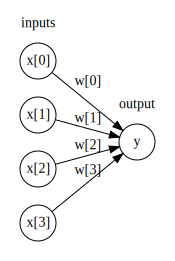

In [2]:
import mglearn

display(mglearn.plots.plot_logistic_regression_graph())

* ここで、左のノード群は入力特徴量を表し、接続している線が学習された係数を、右側のノードが出力を表す

    * 出力は、入力に対する重み付き和になっている
    
* MLPでは、この重み付き和の計算が繰り返し行われる

    * まず中間処理ステップを表す**隠れユニット**の計算で重み付き和が行われる
    
    * 次に、この隠れユニットの値に対して重み付き和が行われて、最後の結果が算出される

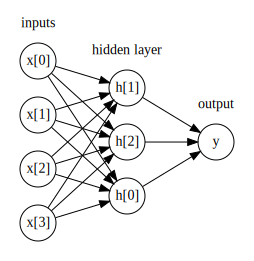

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

* このモデルには、学習しなければならない係数(重みとも呼ばれる)がたくさんある

    * 全ての入力ノード(隠れ層を構成する)全ての隠れユニットの間に1つずつあり、全ての隠れ層のユニットと出力ノードの間にも1つずつある

* 一連の重み付き和を計算することは、数学的に1つの重み付き和を計算することと同じ

    * このモデルを線形モデルよりも強力にするためには、もう少し仕掛けを加える必要がある
    
    * 個々の隠れユニットの重み付き和を計算したら、その結果に対して非線形関数を適用する
    
    * `relu`(正規化線形関数)や`tanh`(双曲正接関数)が用いられる
    
    * この関数の結果が出力$\hat{y}$のための重み付き和に用いられる
    
    * `relu`：ゼロ以下の値を切り捨てている
    
    * `tanh`：小さい値に対しては-1に、大きい値に対しては+1に飽和する
    
* いずれの非線形関数も、ニューラルネットワークが線形モデルよりもはるかに複雑な関数を学習することを可能にする

Text(0, 0.5, 'relu(x), tanh(x)')

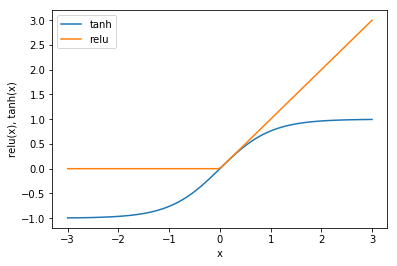

In [5]:
import numpy as np
import matplotlib.pyplot as plt

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

* 上の図に示した小さいニューラルネットワークで回帰を行う場合の$\hat{y}$を計算する式は、次のようになる

    * `tanh`を非線形関数に使う場合
    
\begin{align}
h[0] = tanh(w[0, 0] \times x[0] + w[1, 0] \times x[1] + w[2, 0] \times x[2] + w[3, 0] \times b[0] \\
h[1] = tanh(w[0, 1] \times x[0] + w[1, 1] \times x[1] + w[2, 1] \times x[2] + w[3, 1] \times b[1] \\
h[2] = tanh(w[0, 2] \times x[0] + w[1, 2] \times x[1] + w[2, 2] \times x[2] + w[3, 2] \times b[2] \\
\hat{y} = v[0] \times h[0] + v[1] \times h[1] + v[2] \times v[2] + b
\end{align}

*  ここで、$w$は入力$x$と隠れ層$h$の重み、$v$は隠れ層$h$と出力$\hat{y}$の間の重みである

    * $v$と$w$はデータから学習される重みで、$x$は入力特徴量、$\hat{y}$は計算された結果で、$h$は計算の途中結果である
    
    * ユーザが設定するべき重要なパラメータとして、隠れ層のノード数がある
    
    * これは小さくて単純なデータセットでは10くらいだが、非常に複雑なデータでは10,000にもなる
    
    * さらに、隠れ層を追加することもできる

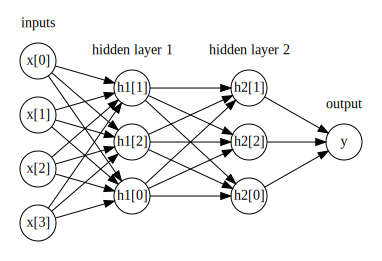

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

* このような計算層をたくさん持つニューラルネットから、「ディープラーニング」と言う言葉が生まれた

## 2. ニューラルネットワークのチューニング

* `MLPClassifier`を、これまでも使ってきた`two_moons`データセットに適用して、MLPが動く様子を見てみる

Text(0, 0.5, 'Feature 1')

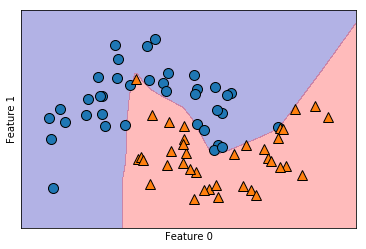

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

* ニューラルネットワークは、全く線形ではないが、比較的なめらかな決定境界を学習している

* デフォルトでは、MLPは100隠れユニットを用いる

    * これはこの小さいデータセットに対しては明らかに大きすぎる
    
    * この数を減らし、モデルの複雑さを減らしても良い結果が得られる

Text(0, 0.5, 'Feature 1')

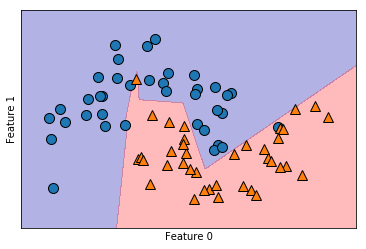

In [11]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

* 隠れ層のユニット数をたった10にすると、決定境界は少しギザギザになる

    * デフォルトでは、非線形化に`relu`を用いる
    
    * 隠れ層が1層の場合には、`relu`を使うと、決定曲線は10の線分から構成されることになる
    
    * 決定曲線をもう少しなめらかにしたければ、隠れ層のユニット層を増やすか、隠れ層を増やすか、非線形活性化関数に`tanh`を用いれば良い

Text(0, 0.5, 'Feature 1')

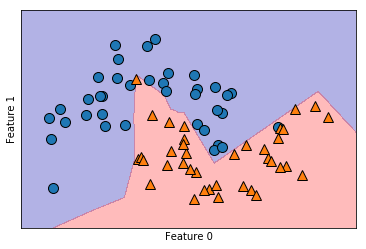

In [12]:
# それぞれ10ユニットの隠れ層を2層使う
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

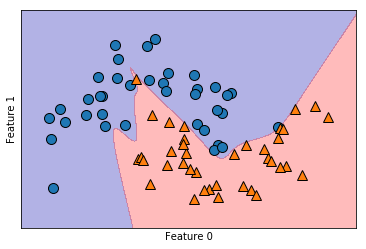

In [13]:
# それぞれ10ユニットの隠れ層を2層使う。さらに非線形活性化関数にtanhを使う
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

* さらに、ニューラルネットワークの複雑さを、リッジ回帰や線形クラス分類器で行なったのと同様に、`l2ペナルティ`で重みを0に近づけることで、制御することができる

    * `MLPClassifier`では、このパラメータは`alpha`で、デフォルトでは非常に小さい値(弱い正則化)に設定されている
    
    * 10ユニットもしくは100ユニットの2層の隠れ層を持つニューラルネットを`two_moons`データセットに適用した場合の、パラメータ`alpha`の効果を示す

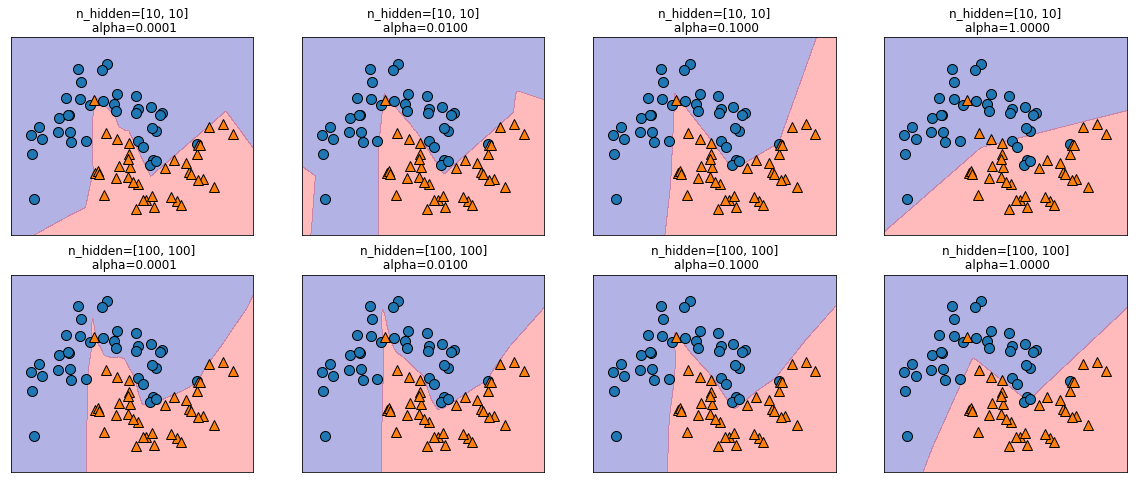

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, h_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[h_hidden_nodes, h_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\n alpha={:.4f}".format(h_hidden_nodes, h_hidden_nodes, alpha))

* ニューラルネットワークには複雑さを制御する方法が、隠れ層の数、隠れ層のユニット数、正則化(`alpha`)と、たくさんあることが理解できる

* ニューラルネットワークは学習を開始する前に重みを乱数で割り当てる

    * この乱数による初期化の影響が、学習されるモデルに影響を与えることは、ニューラルネットワークの重要な性質の一つである
    
    * これは、全く同じパラメータを用いても、異なる乱数シードを用いると、全く異なったモデルが得られることを意味する
    
    * ネットワークが大きくなると、複雑さを適切に設定しさえすれば、精度にはそれほど大きい影響を与えないはずだが、このことを留意するべきである
    
* 以下に示した様々なモデルは、同じパラメータセットで学習したもの

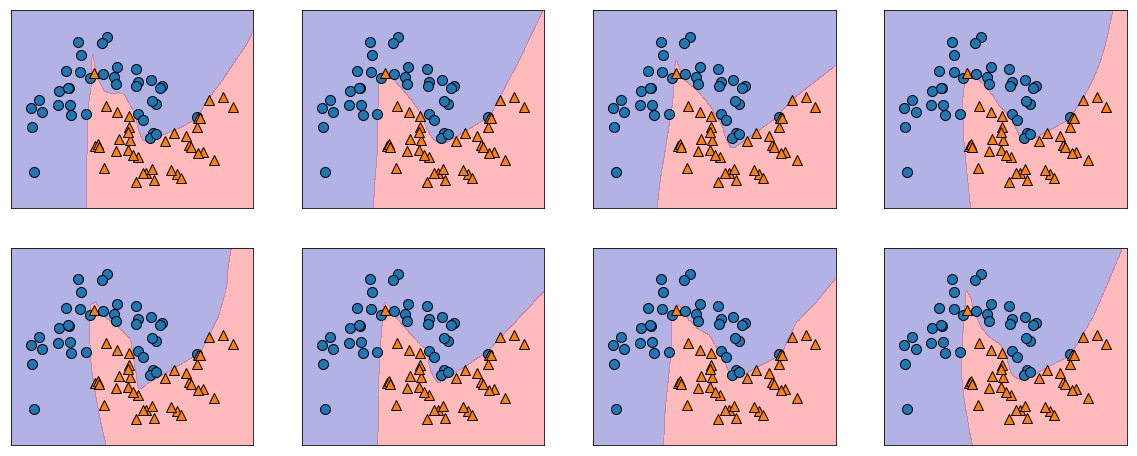

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

* 実データに対するニューラルネットワークを理解するために、`cancer`データセットに対して`MLPClassifier`を適用してみる

    * まずは、デフォルトパラメータで試してみる

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accurracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accurracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accurracy on training set: 0.94
Accurracy on test set: 0.92


* MLPの精度は良いが、他のモデルほどではない

    * SVCの例でも見たように、これはデータスケールの問題
    
    * ニューラルネットワークも、全ての入力特徴量が同じ範囲に収まっていることを仮定している
    
    * 理想的には平均が0か1であるのが望ましい
    
    * この条件を満たすようにデータセットをスケール変換しなければならない

In [22]:
# 訓練セットの特徴量ごとの平均値を算出
mean_on_train = X_train.mean(axis=0)
# 訓練セットの特徴量ごとの標準偏差を算出
std_on_train = X_train.std(axis=0)

# 平均を引き、標準偏差の逆数でスケール変換する
# これでmean=0, std=1になる
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 全く同じ変換(訓練データの平均と標準偏差を使って)をテストセットに施す
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accurracy on training set: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("Accurracy on test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

Accurracy on training set: 0.99
Accurracy on test set: 0.97


/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


* スケール変換を行うと、結果ははるかに良くなり、他のアルゴリズムに並ぶ

    * このモデルに対しては、学習繰り返しの回数が最大値に達したと言う警告が出ている
    
    * これはモデルの学習に使っている`adam`アルゴリズムの機能で、学習繰り返しの回数を増やすべきだと言っている

In [24]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accurracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accurracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accurracy on training set: 1.000
Accurracy on test set: 0.972


* 繰り返し回数を増やすと、訓練セットに対する性能が上がっただけで、汎化性能は上がっていない

    * しかし、モデルの性能は高いと言える
    
    * 訓練性能とテスト性能に差があると言うことは、モデルの複雑さを下げれば、汎化性能が上がる可能性があることを意味する
    
    * ここで、少し乱暴だが`alpha`パラメータを0.0001から1に上げて、重みに対する正則化を強化してみる

In [25]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accurracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accurracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accurracy on training set: 0.988
Accurracy on test set: 0.972


* このようにすることで、これまでのモデルでもベストの性能が出る

* ニューラルネットワークが学習した内容を解析することは可能であるが、線形モデルや決定木を用いたモデルの解析よりも難しい

    * 何が学習されたのかを見る1つの方法は、モデル内部の重みを見てみること
    
    * 入力と第一隠れ層を繋いでいる重みが学習されたものである
    
    * この図の行は30の入力特徴量を表し、列は100の隠れユニットに相当する
    
    * 明るい色が大きな正の値、暗い色が負の値である

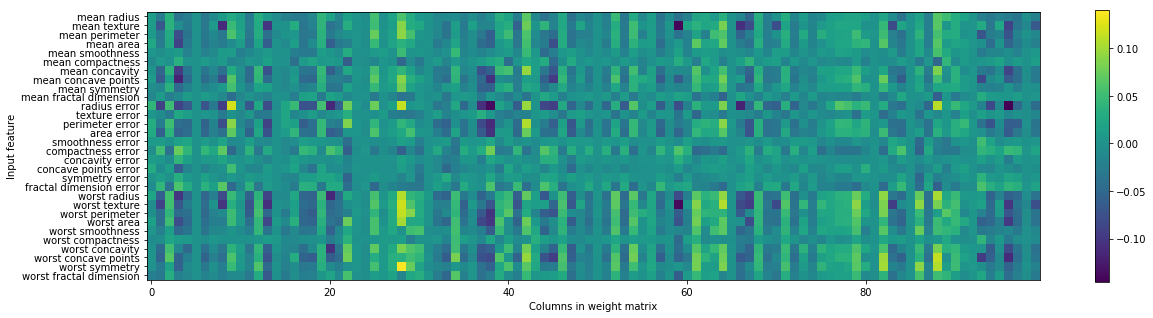

In [28]:
plt.figure(figsize=(20 ,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

* 1つの推論としては、全ての隠れユニットに対して重みがとても小さい特徴量は、このモデルにとって「重要でない」と言える

* 隠れ層から出力層への重みも可視化することができるが、さらにわかりにくい

* MLPClassifierとMLPRegressorは、一般的なニューラルネットワークアーキテクチャを簡単なインターフェースで利用できるようにしてくれるが、

    * ニューラルネットワークで可能なことのごく一部しかカバーしていない
    
    * より柔軟な、もしくはより大きなモデルを使いたいならば、scikit-learnだけでなく他のライブラリも使用する
    
    * `keras`：`tensor-flow`、`theano`のどちらでも利用できる
    
    * これらのライブラリはどれも、高性能なGPU(グラフィック処理ユニット)を使うことができる
    
    * GPUを用いると計算を10倍から100倍高速にすることができる(scikit-learnでは、GPUは対象外)

## 3. 長所、短所、パラメータ

* ニューラルネットワークは、機械学習の多くのアプリケーションにおいて、最先端のモデルとして蘇った

    * ニューラルネットワークの最大の利点は、大量のデータに含まれているデータを費やし、信じられないほど複雑なモデルを構築できること
    
    * 十分な計算時間とデータをかけ、慎重にパラメータを調整すれば、他の機械学習アルゴリズムに勝てることが多い
    
* しかし、これは欠点にもなる

    * ニューラルネットワークは、特に大きくて強力なものは、訓練に時間がかかる
    
    * さらに、ここでも見たように、データを慎重に前処理する必要がある
    
    * SVMと同様に、データが「同質」な場合(全ての特徴量が同じ意味を持つ)に、最も良く機能する
    
    * 様々な種類の特徴量を持つデータに関しては、決定木に基づくモデルの方が性能が良い
    
* ニューラルネットワークのパラメータのチューニングは、それ自体が1つの技芸となっている

    * ここでは、ニューラルネットワークの様々な調整方法と訓練方法のごくごく一部を紹介した

### ニューラルネットワークの複雑さ推定

* 最も重要なパラメータは、隠れ層の数と層当たりの隠れユニットの数である

    * 隠れ層は1つか2つで始め、後から拡張する
    
    * 隠れ層当たりのノードの数は、入力層と同じくらいにすることが多いが、数千より大きくなることはまずない
    
* ニューラルネットワークのモデルの複雑さを考える上で学習すべき重み、もしくは係数の数が1つの尺度となる

    * 100特徴量を持つ2クラス分類データセットがあるとする
    
    * 隠れ層に100のユニットがあったとすると、入力と隠れ層の間の重みの数は、$100 \times 100 = 10,000$となる
    
    * 隠れ層と出力層の間の重みの数は、$100 \times 1 = 100$なので、合わせて10,100の重みがあることになる
    
    * 100の隠れユニットを持つ第2隠れ層を追加すると、第1隠れ層と第2隠れ層の間に$100 \times 100 = 10,000$の重みができるので、合わせて　20,100となる
    
    * 一方、1,000のユニットがある隠れ層が1層の場合には、入力層と隠れ層の間の重みの数は、$100 \times 1,000 = 100,000$である
    
    * ここにさらに1,000ユニットを持つ第2隠れ層を追加すると、$1,000 \times 1,000 = 1,000,000$の重みが追加される(1,101,000となる)
    
* ここでの実験は、モデルの定義に着目した

    * 層の数、層当たりのノードの数、正則化、非線形活性化関数がどのようなモデルを学習するかを定義する
    
    * この他にもどのようにモデルを学習するか(パラメータを学習する際に用いるアルゴリズム)を考える必要がある
    
    * デフォルトの`adam`は、ほとんどのケースで良く機能するが、データのスケールにはとても敏感である(データを平均0、分散1にする)
    
    * `lbfgs`は、モデルが大きい場合や、大規模なデータセットに対しては、訓練に時間がかかる
    
    * `sgd`は、さらに多くの設定パラメータがあり、最良の結果を得るにはこれを調整する必要がある

|  版  |    年/月/日    |
|-----|-----------------|
|初版|2019/03/10|